# 📊 Sales Analytics Project

## Day 1: Project Setup & Data Understanding

### Objective
Understand the sales dataset structure, clean the data, and prepare it for analysis.

### Tools Used
- Python
- Pandas
- Matplotlib
- Seaborn


In [11]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsgit 

# Display settings
pd.set_option('display.max_columns', None)


In [12]:
# Load the dataset
df = pd.read_csv('../data/sales_data.csv')

# View first 5 rows
df.head()


C:\Users\RUCHI\AppData\Local\Temp\ipykernel_20400\197241576.py:2: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/sales_data.csv')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083819 entries, 0 to 1083818
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   InvoiceNo    1083819 non-null  object
 1   StockCode    1083819 non-null  object
 2   Description  1080911 non-null  object
 3   Quantity     1083819 non-null  object
 4   InvoiceDate  1083819 non-null  object
 5   UnitPrice    1083819 non-null  object
 6   CustomerID   813659 non-null   object
 7   Country      1083819 non-null  object
dtypes: object(8)
memory usage: 66.2+ MB


In [14]:
df.describe()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,1083819,1083819,1080911,1083819,1083819,1083819.00,813659.0,1083819
unique,25901,4071,4224,976,23261,2070.00,5640.0,39
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,10/31/2011 14:41,1.25,17841.0,United Kingdom
freq,2228,4626,4738,274597,2228,95583.00,15287.0,990956


In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check missing values
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1606
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     158808
Country             0
dtype: int64

### Data Cleaning
Removing duplicate records and checking for missing values.


## Day 2: Revenue Analysis

### Objective
Identify which products and categories generate the most revenue.


In [16]:
list(df.columns)



['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [17]:
# Clean column names: remove spaces & standardize
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# Detect price column automatically
price_col = None
for col in df.columns:
    if 'price' in col.lower():
        price_col = col
        break

price_col


'UnitPrice'

In [19]:
df[['Quantity', price_col]].dtypes


Quantity     object
UnitPrice    object
dtype: object

In [20]:
# Convert Quantity and Price columns to numeric
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')


In [21]:
df[['Quantity', price_col]] = df[['Quantity', price_col]].fillna(0)


In [22]:
df['Revenue'] = df['Quantity'] * df[price_col]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [23]:
df[['Quantity', price_col, 'Revenue']].head()


,Quantity,UnitPrice,Revenue
0,6.0,2.55,15.30
1,6.0,3.39,20.34
2,8.0,2.75,22.00
3,6.0,3.39,20.34
4,6.0,3.39,20.34


In [24]:
total_revenue = df['Revenue'].sum()
total_revenue


np.float64(10832157.433999995)

In [ ]:
for i, col in enumerate(df.columns):
    print(i, repr(col))


0 'InvoiceNo'
1 'StockCode'
2 'Description'
3 'Quantity'
4 'InvoiceDate'
5 'UnitPrice'
6 'CustomerID'
7 'Country'
8 'Revenue'


In [ ]:
product_col = 'Item_Name'
print("Using product column:", product_col)


Using product column: Item_Name


In [ ]:
print(df.columns.tolist())


['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Revenue']


In [ ]:
product_col = 'Product'
print("Using product column:", product_col)


Using product column: Product


In [26]:
product_col = 'Description'
print(product_col)


Description


In [ ]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
price_col = [c for c in df.columns if 'price' in c.lower()][0]

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

df['Revenue'] = df['Quantity'] * df[price_col]


In [27]:
product_revenue = (
    df.groupby(product_col)['Revenue']
      .sum()
      .sort_values(ascending=False)
)

product_revenue


Description
DOTCOM POSTAGE                        250254.010
REGENCY CAKESTAND 3 TIER              198278.760
WHITE HANGING HEART T-LIGHT HOLDER    113304.790
PARTY BUNTING                         100472.820
JUMBO BAG RED RETROSPOT                98523.000
                                         ...    
Bank Charges                           -8207.939
CRUK Commission                        -9033.870
Adjust bad debt                       -11062.060
Manual                                -70611.620
AMAZON FEE                           -323528.270
Name: Revenue, Length: 4224, dtype: float64

In [28]:
df[[product_col, 'Revenue']].head()


,Description,Revenue
0,WHITE HANGING HEART T-LIGHT HOLDER,15.30
1,WHITE METAL LANTERN,20.34
2,CREAM CUPID HEARTS COAT HANGER,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,20.34


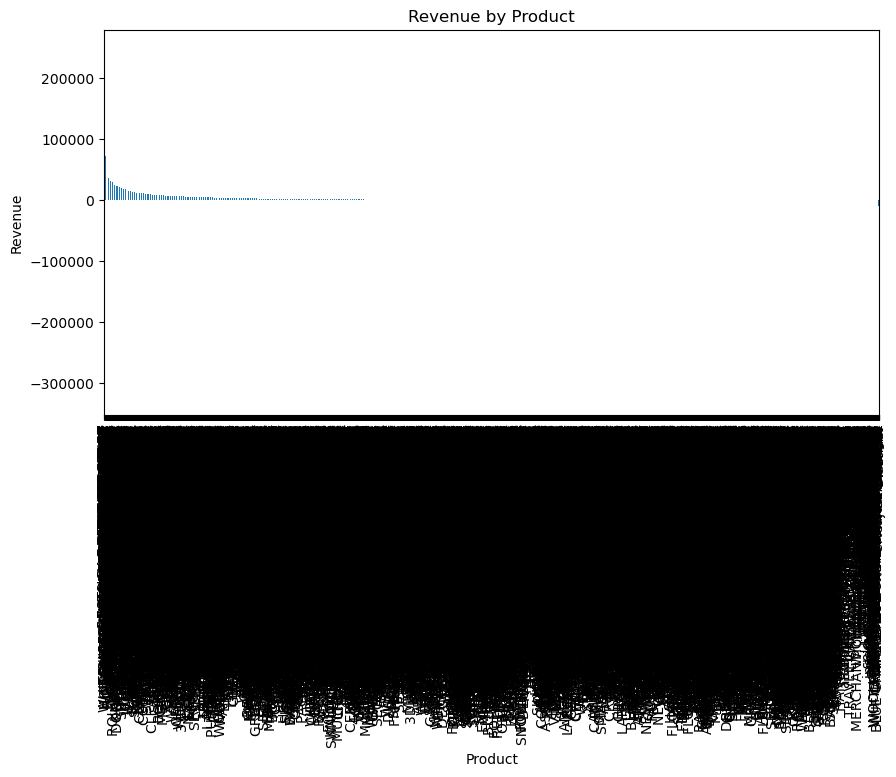

In [30]:
product_revenue.plot(kind='bar', figsize=(10,5))
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.show()


In [31]:
top_products = product_revenue.head(10)
top_products


Description
DOTCOM POSTAGE                        250254.01
REGENCY CAKESTAND 3 TIER              198278.76
WHITE HANGING HEART T-LIGHT HOLDER    113304.79
PARTY BUNTING                         100472.82
JUMBO BAG RED RETROSPOT                98523.00
PAPER CHAIN KIT 50'S CHRISTMAS         78156.11
RABBIT NIGHT LIGHT                     73663.23
POSTAGE                                72935.34
CHILLI LIGHTS                          66020.43
ASSORTED COLOUR BIRD ORNAMENT          64554.77
Name: Revenue, dtype: float64

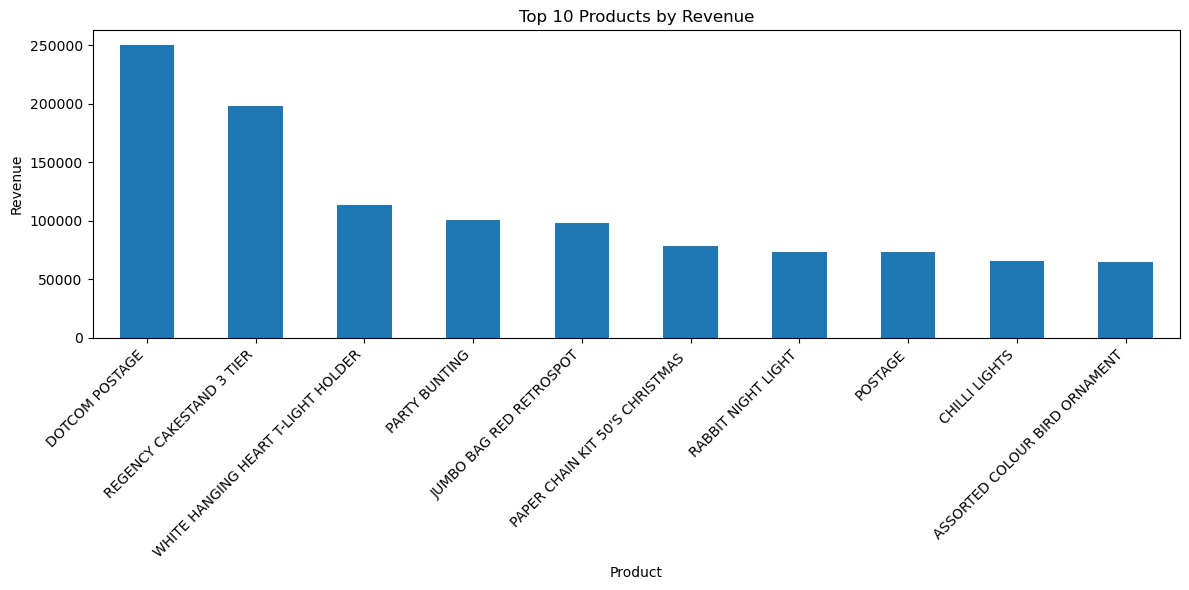

In [32]:
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


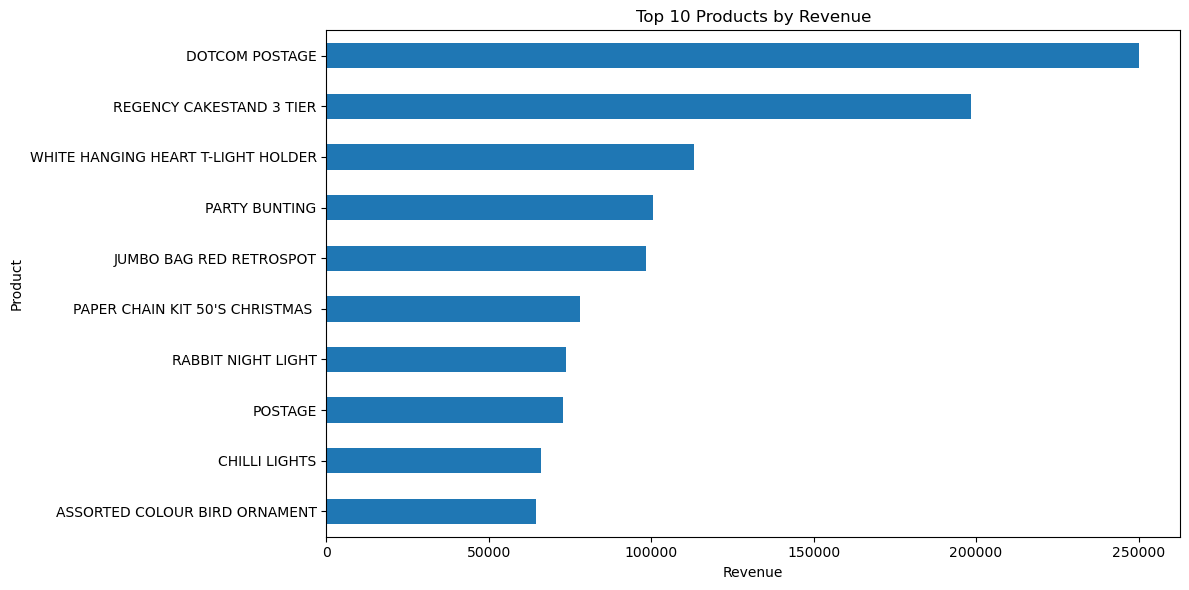

In [33]:
plt.figure(figsize=(12, 6))
top_products.sort_values().plot(kind='barh')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


In [36]:
country_revenue = df.groupby('Country')['Revenue'].sum()
country_revenue


Country
Australia                145101.750
Austria                   11094.560
Bahrain                     548.400
Belgium                   43793.380
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20634.070
Country                       0.000
Cyprus                    14445.830
Czech Republic              707.720
Denmark                   20218.540
EIRE                     277319.090
European Community         1291.750
Finland                   23217.460
France                   213452.120
Germany                  242763.390
Greece                     5391.510
Hong Kong                  9908.240
Iceland                    5246.610
Israel                     7674.530
Italy                     17877.810
Japan                     42818.960
Lebanon                    1693.880
Lithuania                  3322.120
Malta                      2505.470
Netherlands              305174.040
Norway                    41736.280
Poland              

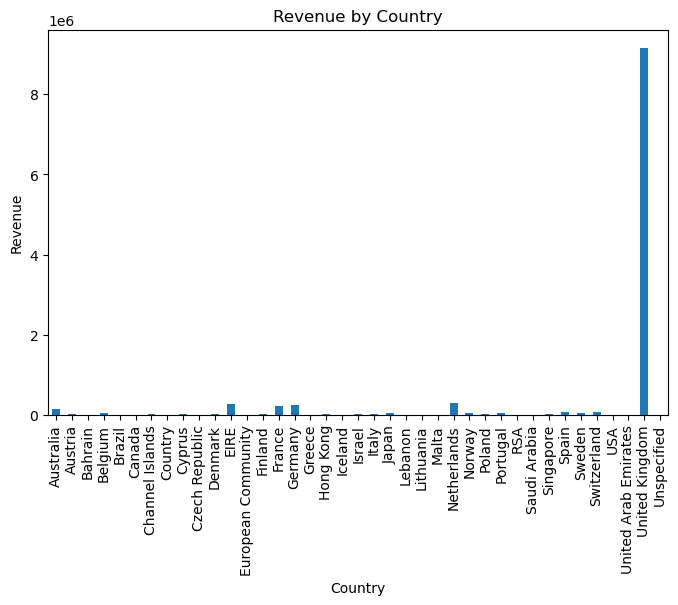

In [37]:
country_revenue.plot(kind='bar', figsize=(8,5))
plt.title('Revenue by Country')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.show()


### Total Revenue
Calculating overall revenue generated by the business.
### Revenue by Product
## Revenu by country